### Step 1 - Install Scikit-learn Library (completed before opening Jupyter on terminal)

### Step 2 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path=r'/Users/coley/Desktop/Data Analyst School/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Data2.csv'))

In [6]:
df.head()

ID                  Title  Year  Age  IMDb  Rotten Tomatoes  Netflix  \
0    869                 Trophy  2016  NaN   7.3             0.98        1   
1  10663         Punk in Africa  2012  NaN   6.1              NaN        0   
2  10682           Killing Heat  1981  13+   4.8              NaN        0   
3  13614  The One Eyed Soldiers  1966  NaN   4.1              NaN        0   
4   7064    Transylvania 6-5000  1985   7+   5.0             0.18        0   

   Hulu  Prime Video  Disney+  ... United Kingdom United States Uruguay  \
0     0            0        0  ...              1             1       0   
1     0            1        0  ...              0             0       0   
2     0            1        0  ...              0             0       0   
3     0            1        0  ...              1             1       0   
4     0            1        0  ...              0             1       0   

   Vanuatu  Venezuela  Vietnam  Yemen  Yugoslavia  Zambia  Zimbabwe  
0        0          0        0      0           0       0         1  
1        0          0        0      0           0       0         1  
2        0          0        0      0           0       1         0  
3        0          0        0      0           1       0         0  
4        0          0        0      0           1       0         0  

[5 rows x 164 columns]

### Step 3 - Clean Data

In [14]:
#check for missing values
df.isnull().sum()

ID               0
Title            0
Year             0
Age           9028
IMDb           354
              ... 
Vietnam          0
Yemen            0
Yugoslavia       0
Zambia           0
Zimbabwe         0
Length: 164, dtype: int64

In [15]:
df.describe()

ID          Year          IMDb  Rotten Tomatoes  \
count  16309.000000  16309.000000  15955.000000      5139.000000   
mean    8340.565393   2002.767674      5.896402         0.653773   
std     4803.086820     20.824430      1.345115         0.266135   
min        1.000000   1902.000000      0.000000         0.020000   
25%     4236.000000   2000.000000      5.100000         0.440000   
50%     8343.000000   2012.000000      6.100000         0.710000   
75%    12485.000000   2016.000000      6.900000         0.880000   
max    16744.000000   2020.000000      9.300000         1.000000   

            Netflix          Hulu   Prime Video       Disney+       Runtime  \
count  16309.000000  16309.000000  16309.000000  16309.000000  16018.000000   
mean       0.208903      0.054694      0.740573      0.034398     93.605569   
std        0.406537      0.227388      0.438334      0.182255     28.092108   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.000000      0.000000      0.000000      0.000000     83.000000   
50%        0.000000      0.000000      1.000000      0.000000     92.000000   
75%        0.000000      0.000000      1.000000      0.000000    104.000000   
max        1.000000      1.000000      1.000000      1.000000   1256.000000   

        Afghanistan  ...  United Kingdom  United States       Uruguay  \
count  16309.000000  ...    16309.000000   16309.000000  16309.000000   
mean       0.000245  ...        0.105034       0.642958      0.001042   
std        0.015659  ...        0.306607       0.479142      0.032270   
min        0.000000  ...        0.000000       0.000000      0.000000   
25%        0.000000  ...        0.000000       0.000000      0.000000   
50%        0.000000  ...        0.000000       1.000000      0.000000   
75%        0.000000  ...        0.000000       1.000000      0.000000   
max        1.000000  ...        1.000000       1.000000      1.000000   

            Vanuatu     Venezuela       Vietnam         Yemen    Yugoslavia  \
count  16309.000000  16309.000000  16309.000000  16309.000000  16309.000000   
mean       0.000061      0.000429      0.000245      0.000061      0.000797   
std        0.007830      0.020714      0.015659      0.007830      0.028223   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Zambia      Zimbabwe  
count  16309.000000  16309.000000  
mean       0.000061      0.000123  
std        0.007830      0.011074  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 159 columns]

In [17]:
df.median()

ID                 8343.00
Year               2012.00
IMDb                  6.10
Rotten Tomatoes       0.71
Netflix               0.00
                    ...   
Vietnam               0.00
Yemen                 0.00
Yugoslavia            0.00
Zambia                0.00
Zimbabwe              0.00
Length: 159, dtype: float64

In [19]:
df['IMDb'].fillna(5.8, inplace=True)

In [20]:
df['Rotten Tomatoes'].fillna(0.65, inplace=True)

In [21]:
df.isnull().sum()

ID               0
Title            0
Year             0
Age           9028
IMDb             0
              ... 
Vietnam          0
Yemen            0
Yugoslavia       0
Zambia           0
Zimbabwe         0
Length: 164, dtype: int64

### Step 4 - Create Visual

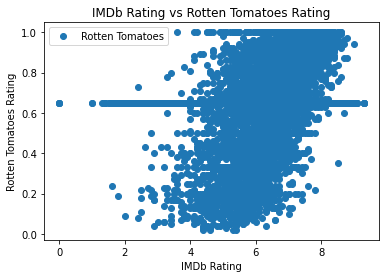

In [22]:
#create scatterplot
df.plot(x = 'IMDb', y='Rotten Tomatoes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('IMDb Rating vs Rotten Tomatoes Rating')  
plt.xlabel('IMDb Rating')  
plt.ylabel('Rotten Tomatoes Rating')  
plt.show()

### Step 5 - State Hypothesis

Hypothesis: Movies will have similar ratings; The higher Rotten Tomatoes rating the higher the IMDb rating will be

### Step 6 - Rehsape into Numphy Arrays

In [25]:
#reshape into numphy arrays
X = df['IMDb'].values.reshape(-1,1)
y = df['Rotten Tomatoes'].values.reshape(-1,1)

In [26]:
X

array([[7.3],
       [6.1],
       [4.8],
       ...,
       [6.7],
       [6.9],
       [4.4]])

In [27]:
y

array([[0.98],
       [0.65],
       [0.65],
       ...,
       [0.65],
       [0.65],
       [0.65]])

### Step 7 - Split Data into Training and Testing Sets

In [28]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Step 8 - Run Linear Regressions

In [29]:
#create regression object
regression = LinearRegression()

In [30]:
#fit regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
y_predicted = regression.predict(X_test)

### Step 9 - Create Plot Showing Regression Line on Test Set

In [32]:
#create plot that shows regression line from test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('IMDb Rating vs Rotten Tomatoes Rating (Test set)')
plot_test.xlabel('IMDb Rating')
plot_test.ylabel('Rotten Tomatoes Rating')
plot_test.show()

### Step 10 - How Does Line Appear to Fit Data

Line does not seem to fit data well. The points all seem to go upwards drastically while the red line is not as sloped

### Step 11 - Check Model Performance Statistics

In [33]:
#check MSE & R2
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02979862]]
Mean squared error:  0.01988631440504187
R2 score:  0.06862607253278985


### Step 12 - Compare Predicted to Actual y Values

In [35]:
y_predicted

array([[0.64082628],
       [0.62294711],
       [0.65870546],
       ...,
       [0.61102767],
       [0.69148394],
       [0.64082628]])

In [36]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0     0.65   0.640826
1     0.50   0.622947
2     0.65   0.658705
3     0.65   0.557390
4     0.70   0.655726
5     0.65   0.643806
6     0.65   0.643806
7     0.75   0.694464
8     0.65   0.599108
9     0.65   0.643806
10    0.65   0.625927
11    0.65   0.691484
12    0.65   0.664665
13    0.65   0.658705
14    0.65   0.640826
15    0.65   0.545471
16    0.65   0.697444
17    0.65   0.581229
18    0.65   0.685524
19    0.34   0.649766
20    0.65   0.649766
21    0.65   0.700424
22    0.65   0.602088
23    0.60   0.625927
24    0.65   0.673605
25    0.65   0.679564
26    0.65   0.631887
27    0.67   0.646786
28    0.80   0.685524
29    0.95   0.700424

### Step 13 - Reflections

Slope: 0.0297
MSE:   0.0198
R2:    0.0686

Slope shows a positive relationship, although it is not very strong. MSE shows a very small number which is good since there are over 16,000 rows of data. R2 shows a poor fit for the data.



Taking a look at the actual vs predicted - some values are quite close but the majority are farther than 0.05 from each other